# Homework 1 Deep Learning Course 

Vincent Lepetit

Adrien BENAMIRA 11-12-2018

In [1]:
from mp1 import *
from keras.models import Sequential, clone_model
from keras.layers import Dense, Activation, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.utils import to_categorical
from keras.regularizers import l2, l1

from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Simple Classification

### Dataset and model

Generation dataset and build-train a linear classifier in Keras to classify a image into one of the three possible categories (i.e. rectangle, disk, triangle). 

2 models have been code : one using stochastic gradient descent optimizer, the other one Adam optimizer.

In [2]:
[X_train_1, Y_train_1] = generate_dataset_classification(300, 20)

Creating data:
0
100
200


In [3]:
#sgd
Simple_clf = Sequential()
Simple_clf.add(Dense(3, input_shape=(5184,), activation='softmax'))
Simple_clf.compile(optimizer='sgd', loss='categorical_crossentropy',
             metrics=['accuracy'])
history = Simple_clf.fit(X_train_1[0:200], to_categorical(Y_train_1[0:200]), 
          validation_data=(X_train_1[200:300], to_categorical(Y_train_1[200:300])),
          epochs=20, batch_size=32)

Train on 200 samples, validate on 100 samples
Epoch 1/20
200/200 [==============================] - 0s 634us/step - loss: 7.2276 - acc: 0.3800 - val_loss: 6.0652 - val_acc: 0.3700
Epoch 2/20
200/200 [==============================] - 0s 145us/step - loss: 7.3245 - acc: 0.3500 - val_loss: 9.4711 - val_acc: 0.3000
Epoch 3/20
200/200 [==============================] - 0s 148us/step - loss: 6.7159 - acc: 0.4250 - val_loss: 8.5089 - val_acc: 0.3800
Epoch 4/20
200/200 [==============================] - 0s 157us/step - loss: 6.5206 - acc: 0.4350 - val_loss: 5.8273 - val_acc: 0.4800
Epoch 5/20
200/200 [==============================] - 0s 152us/step - loss: 5.0624 - acc: 0.6000 - val_loss: 5.5518 - val_acc: 0.5700
Epoch 6/20
200/200 [==============================] - 0s 142us/step - loss: 5.0906 - acc: 0.5950 - val_loss: 5.4560 - val_acc: 0.5800
Epoch 7/20
200/200 [==============================] - 0s 154us/step - loss: 4.9373 - acc: 0.6300 - val_loss: 5.3678 - val_acc: 0.6700
Epoch 8/20
200/2

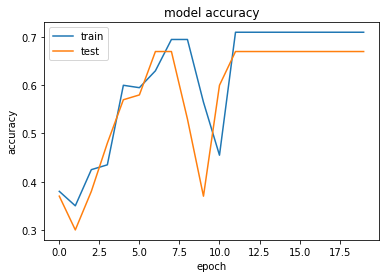

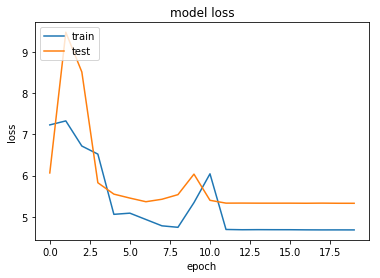

In [4]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [5]:
#Adam
Simple_clf_adam = Sequential()
Simple_clf_adam.add(Dense(3, input_shape=(5184,), activation='softmax'))
Simple_clf_adam.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])
history = Simple_clf_adam.fit(X_train_1[0:200], to_categorical(Y_train_1[0:200]), 
          validation_data=(X_train_1[200:300], to_categorical(Y_train_1[200:300])),
          epochs=20, batch_size=32)


Train on 200 samples, validate on 100 samples
Epoch 1/20
200/200 [==============================] - 0s 715us/step - loss: 1.4413 - acc: 0.5750 - val_loss: 0.8429 - val_acc: 0.5400
Epoch 2/20
200/200 [==============================] - 0s 133us/step - loss: 0.7881 - acc: 0.5500 - val_loss: 1.0579 - val_acc: 0.5400
Epoch 3/20
200/200 [==============================] - 0s 137us/step - loss: 0.6179 - acc: 0.7400 - val_loss: 0.5769 - val_acc: 0.6800
Epoch 4/20
200/200 [==============================] - 0s 137us/step - loss: 0.5229 - acc: 0.7700 - val_loss: 0.5325 - val_acc: 0.7400
Epoch 5/20
200/200 [==============================] - 0s 145us/step - loss: 0.3667 - acc: 0.8450 - val_loss: 0.4999 - val_acc: 0.7400
Epoch 6/20
200/200 [==============================] - 0s 150us/step - loss: 0.2762 - acc: 0.9150 - val_loss: 0.3783 - val_acc: 0.8400
Epoch 7/20
200/200 [==============================] - 0s 158us/step - loss: 0.2806 - acc: 0.9050 - val_loss: 0.3249 - val_acc: 0.8900
Epoch 8/20
200/2

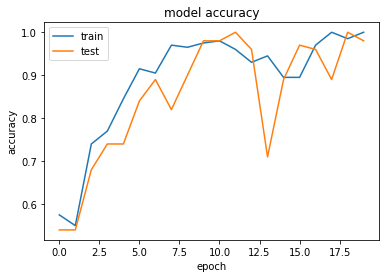

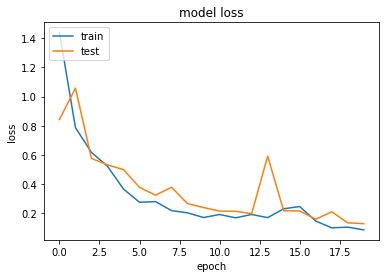

In [6]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Predictions

In [7]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
print(Simple_clf.predict(X_test))
print(Simple_clf_adam.predict(X_test))
print("Ground truth is [[0, 1, 0]]")

[[1. 0. 0.]]
[[0. 1. 0.]]
Ground truth is [[0, 1, 0]]


# Visualization of the Solution

Visualize the weights of the linear classifier.

SGD optimizer


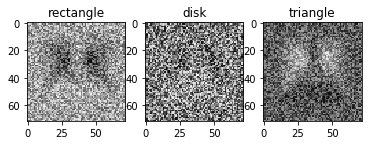

In [8]:
weights = Simple_clf.get_weights()[0].reshape(72,72,3)

print("SGD optimizer")

plt.subplot(131)
plt.imshow(weights[:,:,0], cmap='gray')
plt.title('rectangle')

plt.subplot(132)
plt.imshow(weights[:,:,1], cmap='gray')
plt.title('disk')

plt.subplot(133)
plt.imshow(weights[:,:,2], cmap='gray')
plt.title('triangle')

plt.show()

Adam optimizer


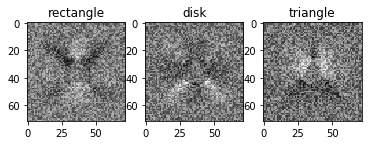

In [9]:
weights = Simple_clf_adam.get_weights()[0].reshape(72,72,3)

print("Adam optimizer")

plt.subplot(131)
plt.imshow(weights[:,:,0], cmap='gray')
plt.title('rectangle')

plt.subplot(132)
plt.imshow(weights[:,:,1], cmap='gray')
plt.title('disk')

plt.subplot(133)
plt.imshow(weights[:,:,2], cmap='gray')
plt.title('triangle')

plt.show()

We can observe that the Adam model has better learn the representaion of the class. Moreover they are all centered

# A More Difficult Classification Problem

### Dataset and old model

Generation of the new training (more difficult) dataset and retrain of the linear classifier on this new training set.

In [10]:
[X_train_not_centered, Y_train_not_centered] = generate_dataset_classification(300, 20, True)
[X_test_not_centered, Y_test_not_centered] = generate_test_set_classification()


Creating data:
0
100
200
Creating data:
0
100
200


In [11]:
Simple_clf_adam2 = Sequential()
Simple_clf_adam2.add(Dense(3, input_shape=(5184,), activation='softmax'))
Simple_clf_adam2.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])
history = Simple_clf_adam2.fit(X_train_not_centered[0:200], to_categorical(Y_train_not_centered[0:200]), 
          validation_data=(X_train_not_centered[200:300], to_categorical(Y_train_not_centered[200:300])),
          epochs=20, batch_size=32)

Train on 200 samples, validate on 100 samples
Epoch 1/20
200/200 [==============================] - 0s 830us/step - loss: 2.7889 - acc: 0.3450 - val_loss: 1.9011 - val_acc: 0.5300
Epoch 2/20
200/200 [==============================] - 0s 132us/step - loss: 1.7724 - acc: 0.3600 - val_loss: 1.3936 - val_acc: 0.4100
Epoch 3/20
200/200 [==============================] - 0s 150us/step - loss: 1.4704 - acc: 0.3700 - val_loss: 1.3149 - val_acc: 0.3000
Epoch 4/20
200/200 [==============================] - 0s 271us/step - loss: 1.2207 - acc: 0.4400 - val_loss: 1.1373 - val_acc: 0.3600
Epoch 5/20
200/200 [==============================] - 0s 343us/step - loss: 1.0710 - acc: 0.4050 - val_loss: 1.1116 - val_acc: 0.3500
Epoch 6/20
200/200 [==============================] - 0s 371us/step - loss: 1.0786 - acc: 0.4350 - val_loss: 1.3559 - val_acc: 0.3300
Epoch 7/20
200/200 [==============================] - 0s 350us/step - loss: 1.1858 - acc: 0.4400 - val_loss: 0.9712 - val_acc: 0.5600
Epoch 8/20
200/2

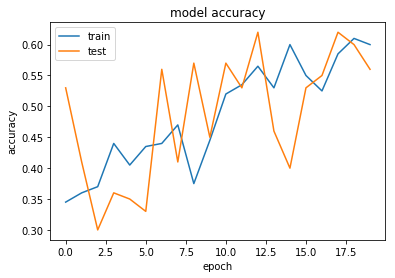

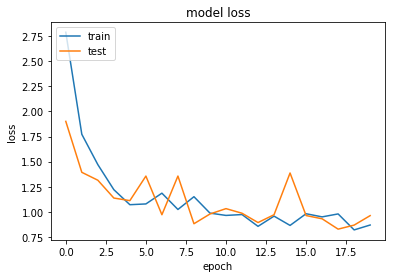

In [12]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
Simple_clf_adam2.evaluate(X_test_not_centered, Y_test_not_centered)

300/300 [==============================] - 0s 61us/step


[1.1070849482218426, 0.49333333333333335]

### Reshape and convolutional (not-to-)deep network

Train a convolutional (not-to-)deep network with reshape dataset

In [14]:
X_train_not_centered_reshaped = X_train_not_centered.reshape(300,72,72,1)
X_test_not_centered_reshaped = X_test_not_centered.reshape(300,72,72,1)



CNN_model = Sequential()
CNN_model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(72,72,1), activation='relu'))
CNN_model.add(MaxPooling2D((4,4)))
CNN_model.add(Dropout(0.5))
CNN_model.add(Flatten())
CNN_model.add(Dense(124, activation='relu'))
CNN_model.add(Dense(3, activation='softmax'))
CNN_model.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])

print(CNN_model.summary())

history = CNN_model.fit(X_train_not_centered_reshaped[0:200], to_categorical(Y_train_not_centered[0:200]), 
          validation_data=(X_train_not_centered_reshaped[200:300], to_categorical(Y_train_not_centered[200:300])),
          epochs=20, batch_size=32)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 70, 70, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 124)               2293628   
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 375       
Total params: 2,294,643
Trainable params: 2,294,643
Non-trainable params: 0
_________________________________________________________________


In [15]:
print("loss and accuracy :")
CNN_model.evaluate(X_test_not_centered_reshaped, Y_test_not_centered)

loss and accuracy :
300/300 [==============================] - 1s 2ms/step


[0.6288589223225911, 0.7633333333333333]

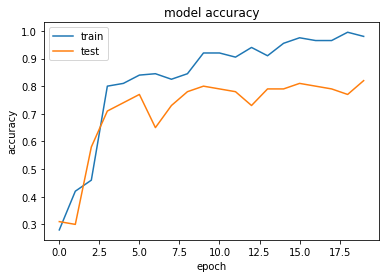

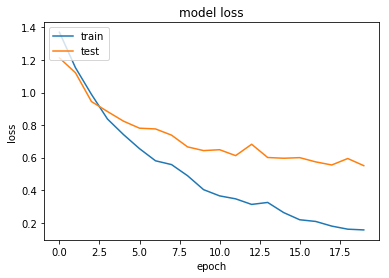

In [16]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# A Regression Problem

### Dataset 

Generate dataset and normalize

Creating data:
0
100
200
300
Creating data:
0
100
200


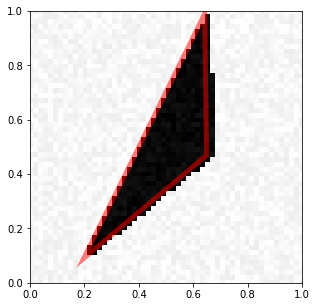

In [17]:
n_sample = 400
[X_train_regression, Y_train_regression] = generate_dataset_regression(n_sample, 20)
[X_test_regression, Y_test_regression] = generate_test_set_regression()
visualize_prediction(X_train_regression[0], Y_train_regression[0])

X_train_regression_reshaped = X_train_regression.reshape(n_sample,72,72,1)
X_test_regression_reshaped = X_test_regression.reshape(300,72,72,1)


normalizer = StandardScaler()
Y_train_regression_reshaped = normalizer.fit_transform(Y_train_regression)
Y_test_regression_reshaped = normalizer.transform(Y_test_regression)
Y_train_regression_reshaped = normalizer.fit_transform(Y_train_regression)
Y_test_regression_reshaped = normalizer.transform(Y_test_regression)

### First preprocessing : from left top to right bottom 

We order points of the triangle from left top to right bottom

In [18]:
Y_train_regression_ordered = np.array([np.array(sorted(Y_train_regression_reshaped[i].reshape(3,2), key=lambda x: x[0])).reshape(6) for i in range(n_sample)])
Y_test_regression_ordered = np.array([np.array(sorted(Y_test_regression_reshaped[i].reshape(3,2), key=lambda x: x[0])).reshape(6) for i in range(300)])

### Model regression

In [19]:
CNN_model_reg = Sequential()
CNN_model_reg.add(Conv2D(40,kernel_size=(5,5),input_shape=(72,72,1,),activation='relu'))
CNN_model_reg.add(Dropout(0.3))
CNN_model_reg.add(Conv2D(20,kernel_size=(4,4),activation='relu'))
CNN_model_reg.add(Flatten())
CNN_model_reg.add(Dropout(0.3))
CNN_model_reg.add(Dense(6))
CNN_model_reg.compile(optimizer='adam', loss='mean_squared_error')

history = CNN_model_reg.fit(X_train_regression_reshaped[:300], Y_train_regression_ordered[:300], 
          validation_data=(X_train_regression_reshaped[300:400], Y_train_regression_ordered[300:400]),
          epochs=50, batch_size=64)

Train on 300 samples, validate on 100 samples
Epoch 1/50
300/300 [==============================] - 9s 31ms/step - loss: 6.6189 - val_loss: 1.4080
Epoch 2/50
300/300 [==============================] - 8s 28ms/step - loss: 1.6494 - val_loss: 0.9926
Epoch 3/50
300/300 [==============================] - 8s 27ms/step - loss: 0.9706 - val_loss: 0.8090
Epoch 4/50
300/300 [==============================] - 9s 29ms/step - loss: 0.7821 - val_loss: 0.9430
Epoch 5/50
300/300 [==============================] - 12s 41ms/step - loss: 0.8020 - val_loss: 0.7975
Epoch 6/50
300/300 [==============================] - 9s 31ms/step - loss: 0.7312 - val_loss: 0.8572
Epoch 7/50
300/300 [==============================] - 9s 31ms/step - loss: 0.6772 - val_loss: 0.7006
Epoch 8/50
300/300 [==============================] - 8s 27ms/step - loss: 0.5734 - val_loss: 0.5994
Epoch 9/50
300/300 [==============================] - 9s 32ms/step - loss: 0.4622 - val_loss: 0.4863
Epoch 10/50
300/300 [=======================

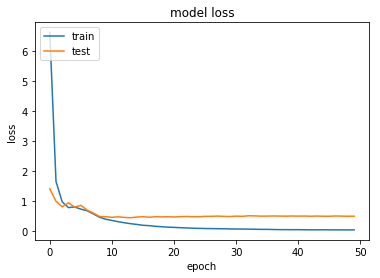

In [20]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluate

In [21]:
Y_pred_train = normalizer.inverse_transform(CNN_model_reg.predict(X_train_regression_reshaped))
Y_pred_test = normalizer.inverse_transform(CNN_model_reg.predict(X_test_regression_reshaped))

Evaluation on train set


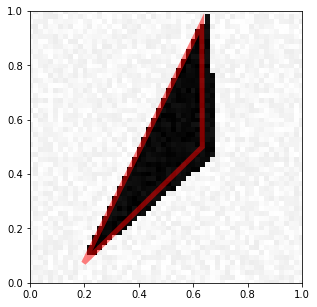

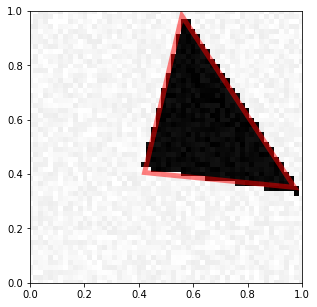

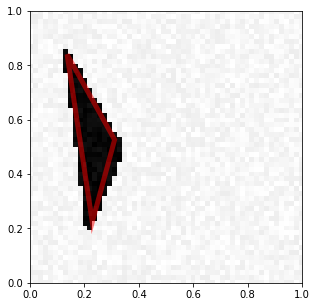

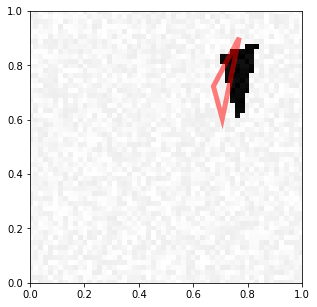

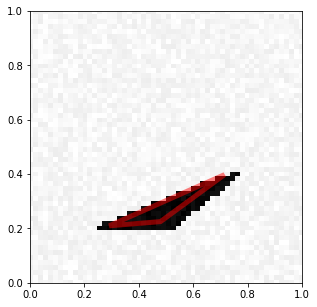

In [22]:
print("Evaluation on train set")
for i in range(5):
    visualize_prediction(X_train_regression_reshaped[i], Y_pred_train[i])
    

Evaluation on test set


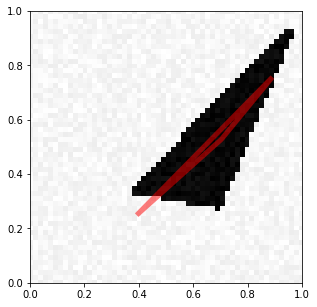

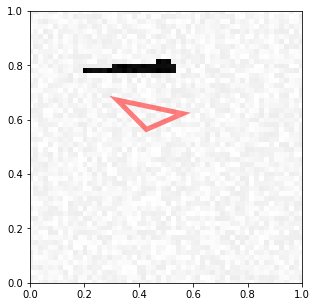

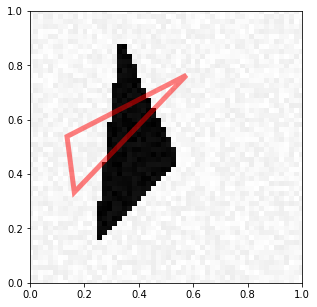

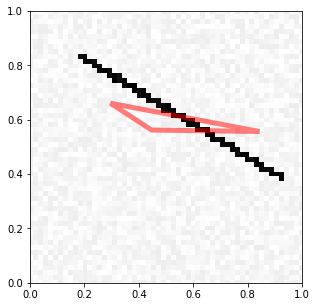

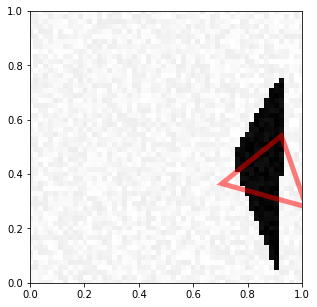

In [23]:
print("Evaluation on test set")
for i in range(5):
    visualize_prediction(X_test_regression_reshaped[i], Y_pred_test[i]) 

### Second preprocessing : distance to the center

We order points in the sense of decreasing segment length from the center

In [24]:
def sorted_by_center(x):
    points = x.reshape(3,2)
    centre = x.mean(axis=0)
    sorted_points = sorted(points, key=lambda e: np.linalg.norm(centre-e))
    return np.array(sorted_points).reshape(6)

In [25]:
Y_train_regression_ordered = np.array([sorted_by_center(x) for x in Y_train_regression_reshaped])
Y_test_regression_ordered = np.array([sorted_by_center(x) for x in Y_test_regression_ordered])

### Model regression

In [26]:
CNN_model_reg = Sequential()
CNN_model_reg.add(Conv2D(40,kernel_size=(5,5),input_shape=(72,72,1,),activation='relu'))
CNN_model_reg.add(Dropout(0.3))
CNN_model_reg.add(Conv2D(20,kernel_size=(4,4),activation='relu'))
CNN_model_reg.add(Flatten())
CNN_model_reg.add(Dropout(0.3))
CNN_model_reg.add(Dense(6))
CNN_model_reg.compile(optimizer='adam', loss='mean_squared_error')

history = CNN_model_reg.fit(X_train_regression_reshaped[:300], Y_train_regression_ordered[:300], 
          validation_data=(X_train_regression_reshaped[300:400], Y_train_regression_ordered[300:400]),
          epochs=15, batch_size=64)

Train on 300 samples, validate on 100 samples
Epoch 1/15
300/300 [==============================] - 10s 35ms/step - loss: 4.5511 - val_loss: 0.9902
Epoch 2/15
300/300 [==============================] - 10s 32ms/step - loss: 1.2554 - val_loss: 0.9929
Epoch 3/15
300/300 [==============================] - 9s 31ms/step - loss: 1.0028 - val_loss: 0.9931
Epoch 4/15
300/300 [==============================] - 10s 32ms/step - loss: 1.0021 - val_loss: 0.9932
Epoch 5/15
300/300 [==============================] - 9s 31ms/step - loss: 1.0021 - val_loss: 0.9933
Epoch 6/15
300/300 [==============================] - 9s 31ms/step - loss: 1.0019 - val_loss: 0.9933
Epoch 7/15
300/300 [==============================] - 9s 30ms/step - loss: 1.0016 - val_loss: 0.9932
Epoch 8/15
300/300 [==============================] - 9s 30ms/step - loss: 0.9995 - val_loss: 0.9916
Epoch 9/15
300/300 [==============================] - 9s 29ms/step - loss: 0.9944 - val_loss: 0.9869
Epoch 10/15
300/300 [=====================

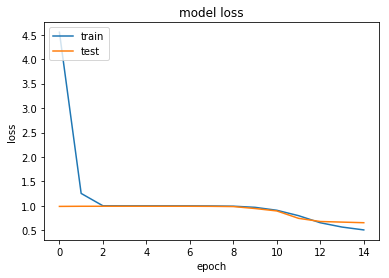

In [27]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluate

In [28]:
Y_pred_train = normalizer.inverse_transform(CNN_model_reg.predict(X_train_regression_reshaped))
Y_pred_test = normalizer.inverse_transform(CNN_model_reg.predict(X_test_regression_reshaped))

Evaluation on train set


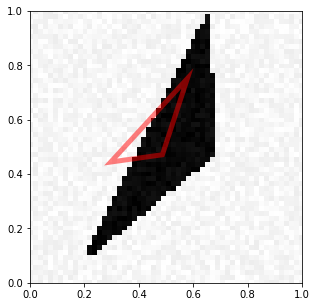

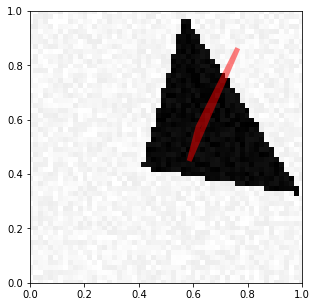

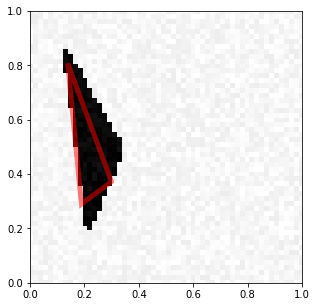

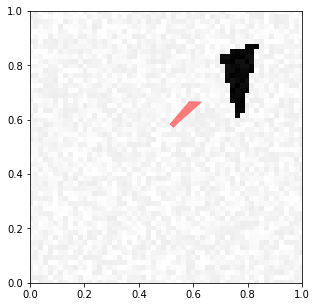

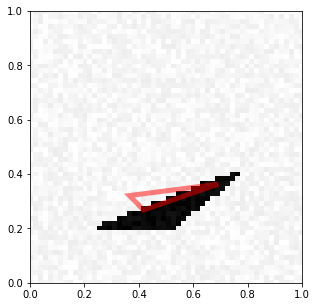

In [29]:
print("Evaluation on train set")
for i in range(5):
    visualize_prediction(X_train_regression_reshaped[i], Y_pred_train[i])
    

Evaluation on test set


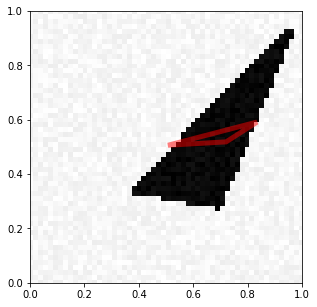

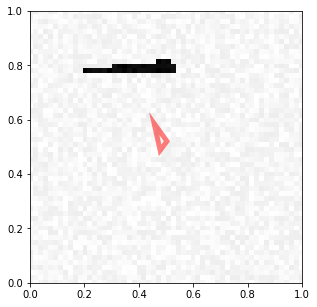

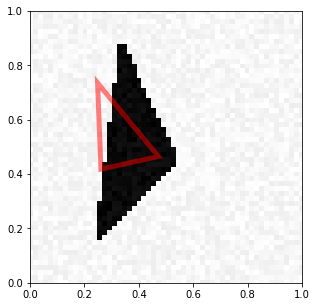

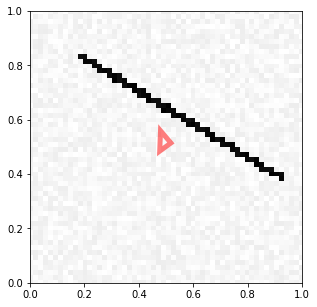

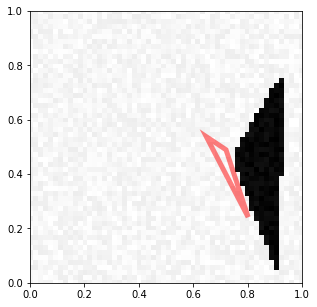

In [30]:
print("Evaluation on test set")
for i in range(5):
    visualize_prediction(X_test_regression_reshaped[i], Y_pred_test[i]) 

### Third preprocessing : angle

We order points in the sense of decreasing segment length from the center

In [31]:
from functools import reduce
import operator
import math
def sorted_by_angle(x):
    coords = x.reshape(3,2)
    center = tuple(map(operator.truediv, reduce(lambda x, y: map(operator.add, x, y), coords), [len(coords)] * 2))
    res = (sorted(coords, key=lambda coord: (-135 - math.degrees(math.atan2(*tuple(map(operator.sub, coord, center))[::-1]))) % 360))
    return np.array(res).reshape(6)

In [32]:
Y_train_regression_ordered = np.array([sorted_by_angle(x) for x in Y_train_regression_reshaped])
Y_test_regression_ordered = np.array([sorted_by_angle(x) for x in Y_test_regression_reshaped])

### Model regression

In [33]:
CNN_model_reg = Sequential()
CNN_model_reg.add(Conv2D(40,kernel_size=(5,5),input_shape=(72,72,1,),activation='relu'))
CNN_model_reg.add(Dropout(0.3))
CNN_model_reg.add(Conv2D(20,kernel_size=(4,4),activation='relu'))
CNN_model_reg.add(Flatten())
CNN_model_reg.add(Dropout(0.3))
CNN_model_reg.add(Dense(6))
CNN_model_reg.compile(optimizer='adam', loss='mean_squared_error')

history = CNN_model_reg.fit(X_train_regression_reshaped, Y_train_regression_ordered, 
          validation_data=(X_train_regression_reshaped[300:400], Y_train_regression_ordered[300:400]),
          epochs=30, batch_size=64)

Train on 400 samples, validate on 100 samples
Epoch 1/30
400/400 [==============================] - 13s 31ms/step - loss: 7.9207 - val_loss: 1.8092
Epoch 2/30
400/400 [==============================] - 14s 35ms/step - loss: 1.3610 - val_loss: 0.9915
Epoch 3/30
400/400 [==============================] - 16s 40ms/step - loss: 0.9984 - val_loss: 0.9894
Epoch 4/30
400/400 [==============================] - 21s 53ms/step - loss: 0.9955 - val_loss: 0.9872
Epoch 5/30
400/400 [==============================] - 17s 43ms/step - loss: 0.9930 - val_loss: 0.9848
Epoch 6/30
400/400 [==============================] - 15s 37ms/step - loss: 0.9587 - val_loss: 0.8157
Epoch 7/30
400/400 [==============================] - 16s 39ms/step - loss: 0.7714 - val_loss: 0.9305
Epoch 8/30
400/400 [==============================] - 13s 33ms/step - loss: 0.7573 - val_loss: 0.9130
Epoch 9/30
400/400 [==============================] - 11s 28ms/step - loss: 0.7417 - val_loss: 0.8179
Epoch 10/30
400/400 [===============

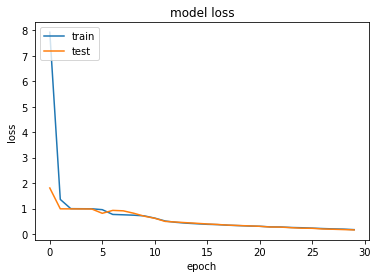

In [34]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluate

In [35]:
Y_pred_train = normalizer.inverse_transform(CNN_model_reg.predict(X_train_regression_reshaped))
Y_pred_test = normalizer.inverse_transform(CNN_model_reg.predict(X_test_regression_reshaped))

Evaluation on train set


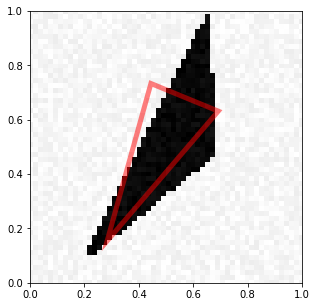

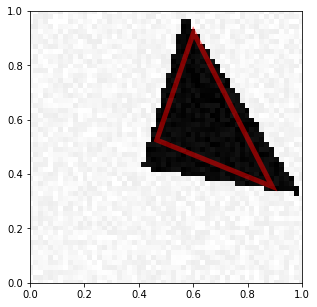

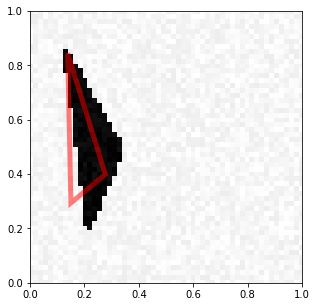

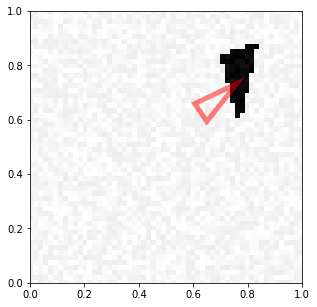

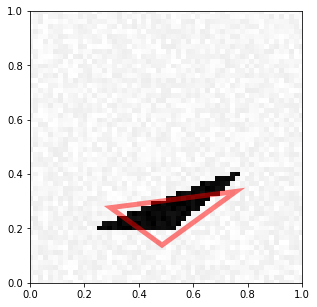

In [36]:
print("Evaluation on train set")
for i in range(5):
    visualize_prediction(X_train_regression_reshaped[i], Y_pred_train[i])
    

Evaluation on test set


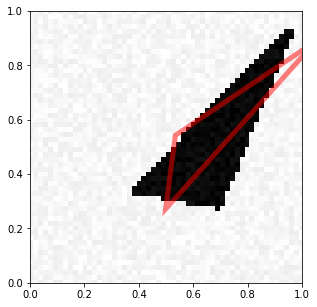

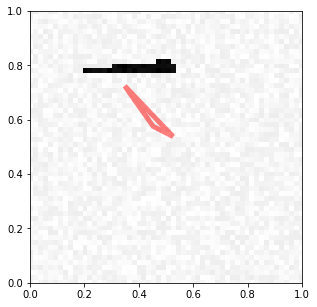

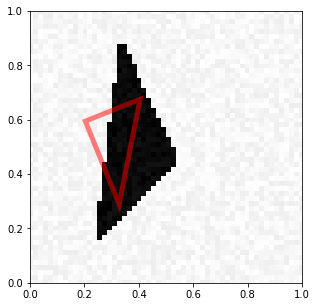

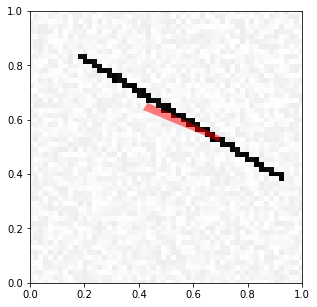

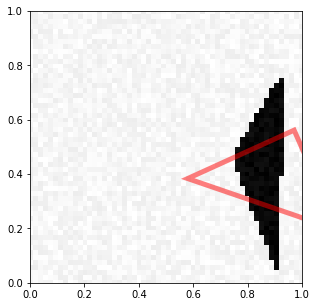

In [37]:
print("Evaluation on test set")
for i in range(5):
    visualize_prediction(X_test_regression_reshaped[i], Y_pred_test[i]) 

# Image Denoising

Rewrite main functions of main1 to generate a good dataset

In [38]:
def generate_dataset_noise(nb_samples, free_location=False):
    # Getting im_size:
    noise = np.random.randint(1,50)
    im_size = generate_a_rectangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    X_noise = np.zeros([nb_samples,im_size])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 100 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i], X_noise[i] = generate_a_rectangle(noise, free_location)
        elif category == 1:
            X[i], X_noise[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V], X_noise[i] = generate_a_triangle(noise, free_location)  
    X = (X) / (255)
    X_noise = (X_noise + noise) / (255)
    return X, X_noise

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata_noise = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata, imdata_noise

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata, imdata_noise = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]], imdata_noise

def visualize_prediction(x):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((72,72))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    plt.show()

### Dataset

Creating data:
0
100
200
input


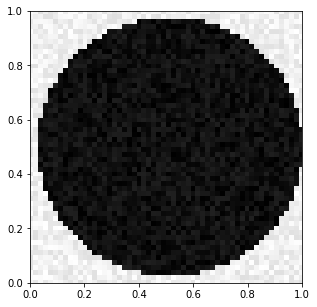

output


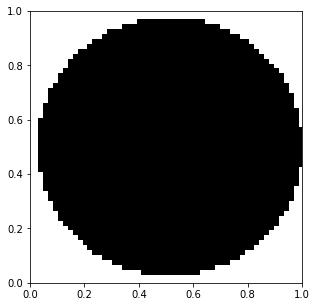

In [39]:
X_train_denoise_output, X_train_noise_input = generate_dataset_noise(300, free_location=False)

print('input')
visualize_prediction(X_train_noise_input[5])
print('output')
visualize_prediction(X_train_denoise_output[5])

X_train_denoise_output_reshaped = X_train_denoise_output.reshape(300,72,72,1)
X_train_noise_input_reshaped = X_train_noise_input.reshape(300,72,72,1)

### Model

In [40]:
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D, Conv2D, Concatenate
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator



IMAGE_SIZE = 72

inputs = Input(shape=(IMAGE_SIZE, IMAGE_SIZE,1))
conv1a = Conv2D(16, 3, activation='relu', padding = 'same')(inputs)
conv1b = Conv2D(16, 3, activation='relu', padding = 'same')(conv1a)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1b)

conv2a = Conv2D(32, 3, activation='relu', padding = 'same')(pool1)
conv2b = Conv2D(32, 3, activation='relu', padding = 'same')(conv2a)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2b)

conv3a = Conv2D(64, 3, activation='relu', padding = 'same')(pool2)
conv3b = Conv2D(64, 3, activation='relu', padding = 'same')(conv3a)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3b)

up4 = UpSampling2D(size=(2, 2))(pool3)
up_conv4 = Conv2D(64, 2, activation='relu', padding = 'same')(up4)
conv4b = Conv2D(64, 3, activation='relu', padding = 'same')(up_conv4)
conv4c = Conv2D(64, 3, activation='relu', padding = 'same')(conv4b)

up5 = UpSampling2D(size=(2, 2))(conv4c)
up_conv5 = Conv2D(32, 2, activation='relu', padding = 'same')(up5)
merge5 = Concatenate(axis=3)([conv2b, up_conv5])
conv5b = Conv2D(32, 3, activation='relu', padding = 'same')(merge5)
conv5c = Conv2D(32, 3, activation='relu', padding = 'same')(conv5b)

up6 = UpSampling2D(size=(2, 2))(conv5c)
up_conv6 = Conv2D(64, 2, activation='relu', padding = 'same')(up6)
merge6 = Concatenate(axis=3)([conv1b, up_conv6])
conv6b = Conv2D(64, 3, activation='relu', padding = 'same')(merge6)
conv6c = Conv2D(64, 3, activation='relu', padding = 'same')(conv6b)
    
conv7 = Conv2D(1, 1, activation="sigmoid")(conv6c)


Hourglass = Model(inputs=inputs, outputs=conv7)

Hourglass.compile(optimizer = 'adam',loss = 'binary_crossentropy')
Hourglass.summary()




history = Hourglass.fit(X_train_noise_input_reshaped[0:200], X_train_denoise_output_reshaped[0:200], 
          validation_data=(X_train_noise_input_reshaped[200:300], X_train_denoise_output_reshaped[200:300]),
          epochs=6, batch_size=32)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 72, 72, 1)    0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 72, 72, 16)   160         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 72, 72, 16)   2320        conv2d_8[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 36, 36, 16)   0           conv2d_9[0][0]                   
__________________________________________________________________________________________________
conv2d_10 

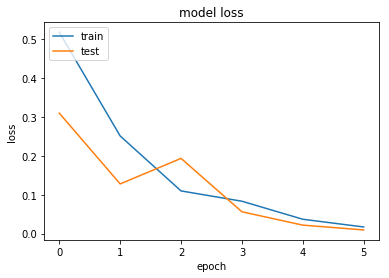

In [41]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Eval

In [42]:
X_test_denoise_output, X_test_noise_input = generate_dataset_noise(5, free_location=False)


X_test_denoise_output_reshaped = X_test_denoise_output.reshape(5,72,72,1)
X_test_noise_input_reshaped = X_test_noise_input.reshape(5,72,72,1)


Y_pred_test = Hourglass.predict(X_test_noise_input_reshaped)
Y_pred_train = Hourglass.predict(X_train_noise_input_reshaped)




Creating data:
0


Eval on train
input


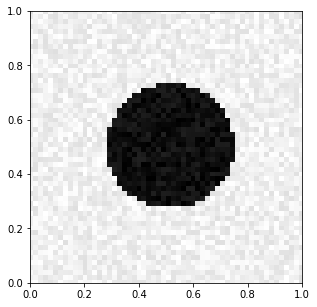

Pred


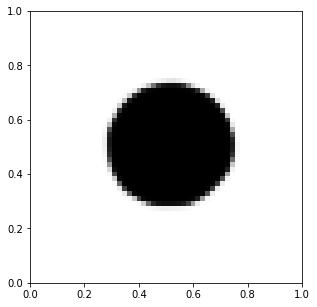

input


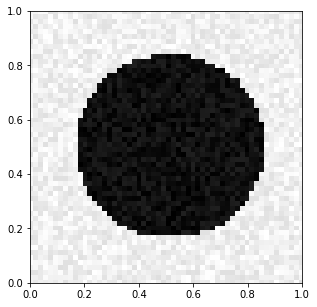

Pred


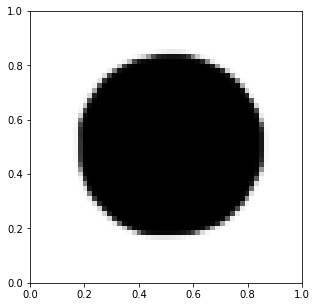

input


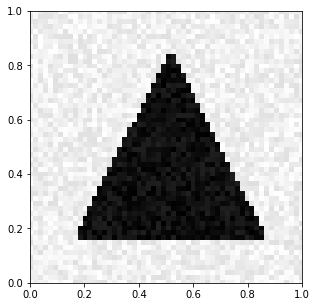

Pred


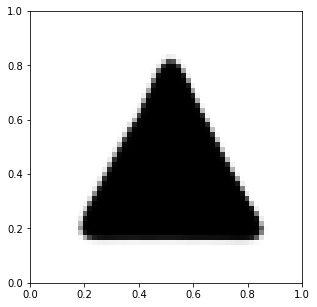

input


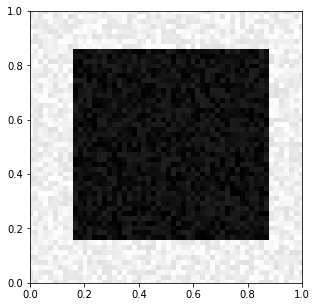

Pred


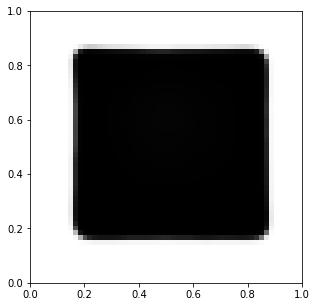

input


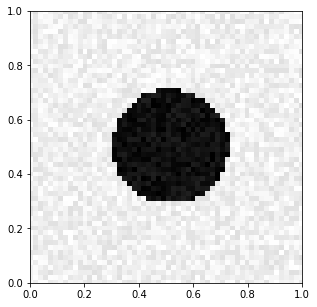

Pred


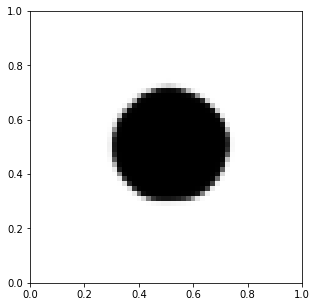

In [43]:
print("Eval on train")
for i in range(5):
    print("input")
    visualize_prediction(X_train_noise_input_reshaped[i])
    print("Pred")
    visualize_prediction(Y_pred_train[i])

Eval on test
input


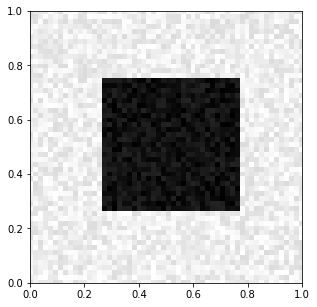

Pred


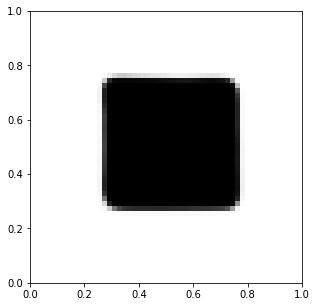

input


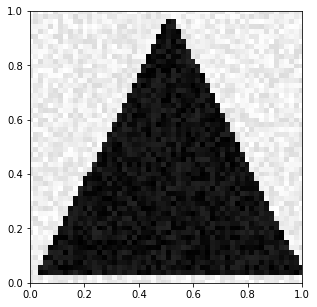

Pred


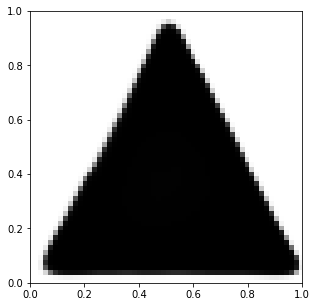

input


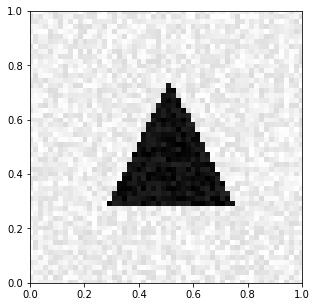

Pred


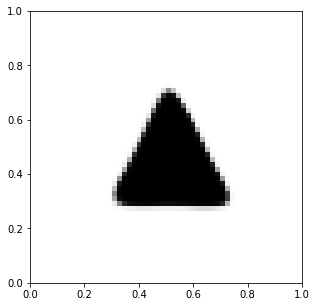

input


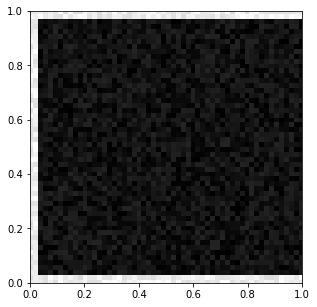

Pred


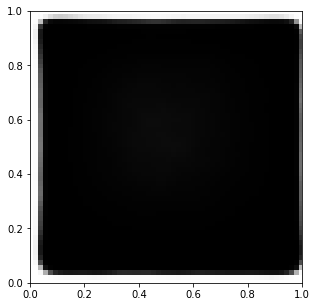

input


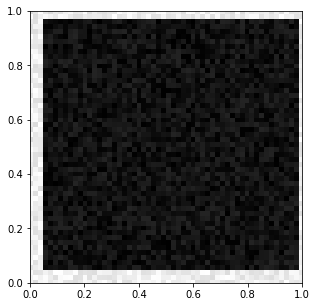

Pred


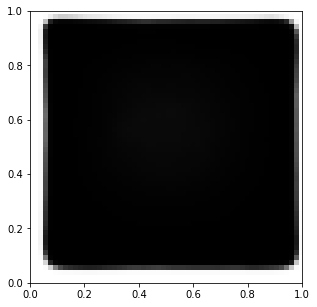

In [44]:
print("Eval on test")
for i in range(5):
    print("input")
    visualize_prediction(X_test_noise_input_reshaped[i])
    print("Pred")
    visualize_prediction(Y_pred_test[i])